In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# import os
# os.chdir("/content/drive/My Drive/Kuulab")
# !pwd

# import warnings
# warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
#import first dataset
mushroom_df=pd.read_csv("mushrooms.csv")
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#start preprocessing
from sklearn.preprocessing import LabelEncoder
Lb = LabelEncoder()

for features in mushroom_df.columns:
    mushroom_df[features] = Lb.fit_transform(mushroom_df[features])
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [21]:
mushroom_X = pd.DataFrame(mushroom_df.drop(columns=['class'],axis=1)[:-100])
mushroom_Y = np.array(mushroom_df['class'][:-100])
print(mushroom_X.head())
print(mushroom_Y)

   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                     

In [6]:
#import metrics for evaluation
#import k-fold 
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict,train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [24]:
x00, x_00_Validate, y00, y_00_Validate =train_test_split(preprocessing.minmax_scale(mushroom_X),(mushroom_Y.reshape((-1,1))), 
                                                    test_size=0.25)
y00=pd.DataFrame(y00)
x00=pd.DataFrame(x00)
print(y_00_Validate)
x00

[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,1.000000,0.222222,1.0,0.625,1.0,0.0,0.0,0.454545,1.0,...,0.666667,0.875,0.375,0.0,0.666667,0.5,1.0,0.250,0.8,0.000000
1,1.0,1.000000,0.222222,1.0,0.625,1.0,0.0,0.0,0.454545,1.0,...,0.666667,0.750,0.750,0.0,0.666667,0.5,1.0,0.375,0.8,0.000000
2,1.0,0.666667,0.888889,0.0,0.625,1.0,1.0,0.0,0.272727,1.0,...,0.000000,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.6,0.166667
3,1.0,0.000000,0.222222,1.0,0.625,1.0,0.0,0.0,0.636364,1.0,...,0.666667,0.750,0.875,0.0,0.666667,0.5,1.0,0.250,1.0,0.000000
4,1.0,1.000000,0.333333,1.0,0.625,1.0,0.0,0.0,0.909091,1.0,...,0.666667,0.750,0.875,0.0,0.666667,0.5,1.0,0.250,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,0.4,0.000000,0.444444,1.0,0.625,1.0,0.0,0.0,0.909091,1.0,...,0.666667,0.375,0.875,0.0,0.666667,0.5,1.0,0.375,1.0,0.000000
6014,0.4,1.000000,0.222222,1.0,0.625,1.0,0.0,0.0,0.818182,1.0,...,0.666667,0.375,0.375,0.0,0.666667,0.5,1.0,0.375,0.8,0.000000
6015,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
6016,1.0,0.000000,0.333333,0.0,0.250,1.0,0.0,0.0,0.181818,0.0,...,0.333333,0.750,0.500,0.0,0.666667,0.5,0.5,0.125,1.0,0.666667


In [8]:
kfold = KFold(n_splits = 2)
Histories=[]

C:\Users\cemnu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with polynomial kernel and C=1.0 : 1.0000
Confusion matrix of model
[[1544    0]
 [   0 1465]]


C:\Users\cemnu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with polynomial kernel and C=1.0 : 1.0000
Confusion matrix of model
[[1593    0]
 [   0 1416]]


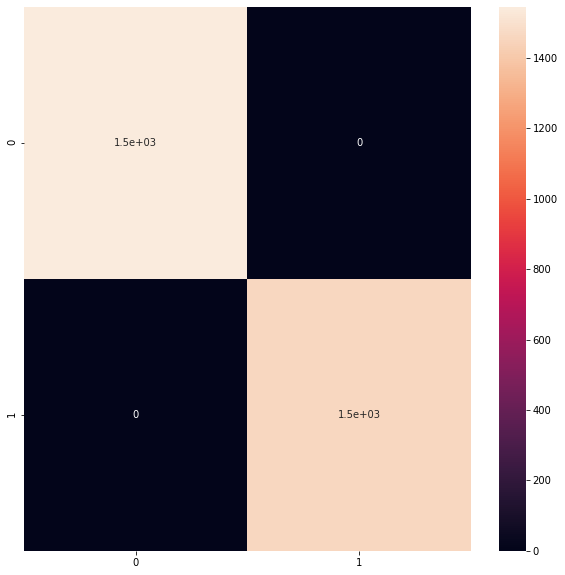

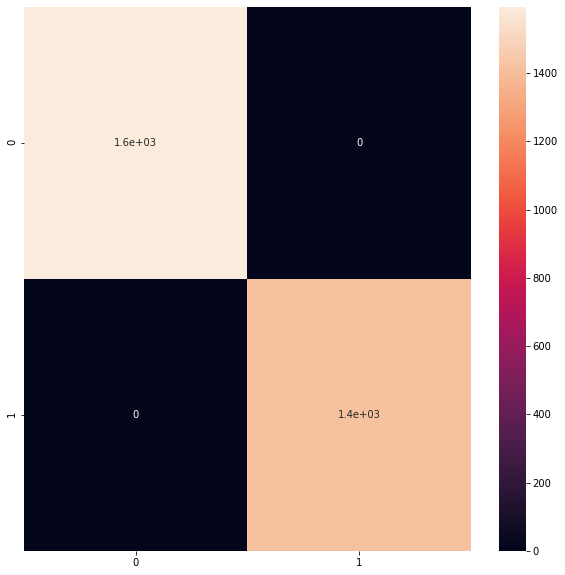

In [9]:
# import svm model
# kernel value can also be lineer
from sklearn.svm import SVC
model_1=SVC(kernel='poly',C=1.0)
score=0
for train_index, test_index in kfold.split(x00):
    #crossvalidation splitting
    X_train, X_test = x00.iloc[train_index], x00.iloc[test_index]
    Y_train, Y_test = y00.iloc[train_index], y00.iloc[test_index]
    model_1.fit(X_train,Y_train)
    pred=pd.DataFrame(model_1.predict(X_test))
    # print(pred)
    # print(Y_test)
    
    print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, pred)))
    print("Confusion matrix of model")
    cm=confusion_matrix(Y_test, pred)
    print(cm)
    plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True)
    


the svm  model returned 

In [10]:
winedf=pd.read_csv("winequality-red.csv")
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wine_X = winedf.drop('quality',axis=1).copy()
wine_Y = np.array(winedf['quality'])

In [12]:
wine_x, wine_x_Validate, wine_y, wine_y_Validate =train_test_split(preprocessing.minmax_scale(wine_X),(wine_Y.reshape((-1,1))), 
                                                    test_size=0.25)
wine_x=pd.DataFrame(wine_x)
wine_y=pd.DataFrame(wine_y)


C:\Users\cemnu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cemnu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with polynomial kernel and C=1.0 : 0.5483
Confusion matrix of model
[[  0   0   4   0   0   0]
 [  0   0  14   5   0   0]
 [  2   1 189  52   3   0]
 [  2   4 110 121  15   2]
 [  0   0   8  43  19   0]
 [  0   0   0   4   2   0]]
Model accuracy score with polynomial kernel and C=1.0 : 0.6077
Confusion matrix of model
[[  0   0   2   1   0   0]
 [  0   1  14   3   1   0]
 [  0   2 189  78   1   0]
 [  0   0  53 149  17   2]
 [  0   0   5  49  25   0]
 [  0   0   0   6   1   0]]


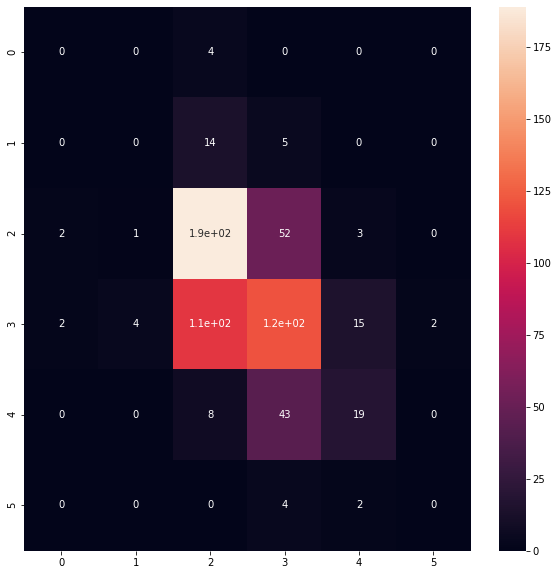

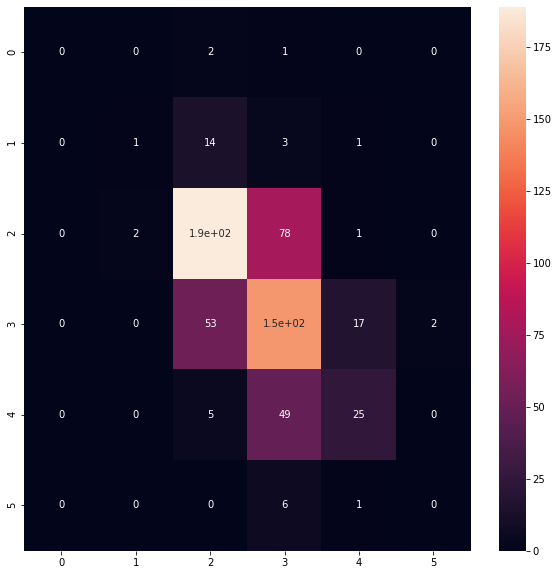

In [13]:
model_2=SVC(kernel='poly',C=1.0)
for train_index, test_index in kfold.split(wine_x):
    #crossvalidation splitting
    X_train, X_test = wine_x.iloc[train_index], wine_x.iloc[test_index]
    Y_train, Y_test = wine_y.iloc[train_index], wine_y.iloc[test_index]
    model_2.fit(X_train,Y_train)
    pred=pd.DataFrame(model_2.predict(X_test))
    # print(pred)
    # print(Y_test)
    
    print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, pred)))
    print("Confusion matrix of model")
    cm=confusion_matrix(Y_test, pred)
    print(cm)
    plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True)


In this section we have multi class output because of this situation our model not work well
We can use multiclass svm models to solve this problem

In [14]:
cancer_df=pd.read_csv("breast_cancer.csv")
cancer_df=cancer_df.drop(["id","Unnamed: 32"],axis=1)
print(cancer_df.isnull().sum())
cancer_df["diagnosis"].replace('M', 1 , inplace=True)
cancer_df["diagnosis"].replace('B', 0 , inplace=True)
cancer_Y=np.array(cancer_df["diagnosis"])
cancer_X=cancer_df.drop(["diagnosis"],axis=1)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [15]:
cancer_x, cancer_x_Validate, cancer_y, cancer_y_Validate =train_test_split(preprocessing.minmax_scale(cancer_X),(cancer_Y.reshape((-1,1))), 
                                                    test_size=0.25)
cancer_x=pd.DataFrame(cancer_x)
cancer_y=pd.DataFrame(cancer_y)

Model accuracy score with polynomial kernel and C=1.0 : 0.9624
Confusion matrix of model
[[133   3]
 [  5  72]]
Model accuracy score with polynomial kernel and C=1.0 : 0.9765
Confusion matrix of model
[[130   1]
 [  4  78]]


C:\Users\cemnu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cemnu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


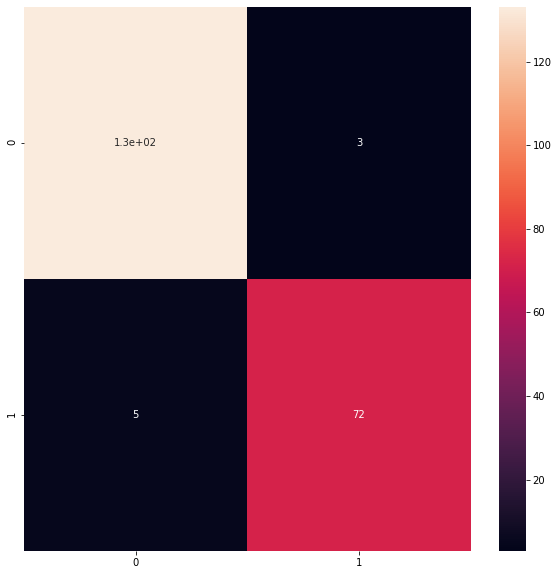

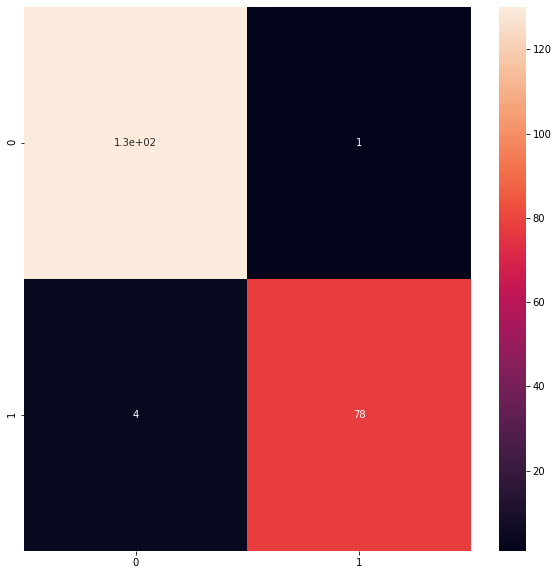

In [35]:
model_3=SVC(kernel='poly',C=1.0)
for train_index, test_index in kfold.split(cancer_x):
    #crossvalidation splitting
    X_train, X_test = cancer_x.iloc[train_index], cancer_x.iloc[test_index]
    Y_train, Y_test = cancer_y.iloc[train_index], cancer_y.iloc[test_index]
    model_3.fit(X_train,Y_train)
    pred=model_3.predict(X_test)
    # print(pred)
    # print(Y_test)
    
    print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, pred)))
    print("Confusion matrix of model")
    cm=confusion_matrix(Y_test,pred)
    print(cm)
    plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True)